In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import seaborn as sns
import os
import json
import re
pd.options.display.float_format = "{:.2f}".format
import warnings
warnings.filterwarnings("ignore")

In [37]:
os.getcwd()

'c:\\Users\\ricka\\Dropbox\\Candido Mendes\\2021-1\\Presencial\\Data Science\\Aulas\\pratica\\aula_08-04-2021'

In [38]:
df_raw_file = os.path.join(os.getcwd(), 'df_raw.json')
if os.path.isfile(df_raw_file):
    try:
        df_raw = pd.read_json(df_raw_file, orient='records')
    except Exception as e:
        print('Reading Error: ', e)
else:
    print('File not exists')

In [39]:
df_raw_subset = df_raw[['sales_price','area','bedrooms','bathrooms','garage','tax','zip_code']]

In [40]:
df_raw_subset.head(15)

,sales_price,area,bedrooms,bathrooms,garage,tax,zip_code
0,R$ 610.000,50m²,1,1,0.00,R$ 390,22250210
1,R$ 1.020.000,74m²,2,2,1.00,None,22260040
2,R$ 1.735.000,93m²,3,1,1.00,R$ 1.371,22280110
3,R$ 800.000,88m²,3,1,0.00,R$ 440,22260140
4,R$ 229.000,23m²,None,1,0.00,R$ 540,22250040
5,R$ 1.350.057,114m²,3,3,2.00,R$ 1.400,22260100
6,R$ 1.250.000,79m²,3,1,1.00,R$ 873,22281033
7,R$ 2.100.000,308m²,3,2,1.00,R$ 800,22251040
8,R$ 350.000,21m²,None,1,0.00,R$ 350,22250040
9,R$ 1.938.000,132m²,3,4,2.00,R$ 0,22280020


In [41]:
df_raw_subset.tail(15)

,sales_price,area,bedrooms,bathrooms,garage,tax,zip_code
2901,R$ 580.000,69m²,2,1,NaN,R$ 790,22250040
2902,R$ 1.200.000,105m²,3,2,1.00,R$ 1.250,22260001
2903,R$ 1.968.000,112m²,3,2,1.00,None,22270010
2904,R$ 950.000,77m²,2,1,1.00,R$ 1.010,22270016
2905,R$ 994.000,66m²,2,1,0.00,R$ 700,22280004
2906,R$ 610.000,50m²,1,1,0.00,R$ 500,22250210
2907,R$ 1.300.000,110m²,2,2,1.00,R$ 980,22260007
2908,R$ 525.000,40m²,1,1,0.00,R$ 550,22280110
2909,R$ 850.000,83m²,3,0,1.00,R$ 776,22251090
2910,R$ 850.000,85m²,2,1,0.00,R$ 850,22270005


In [42]:
df_raw_subset.sample(10)

,sales_price,area,bedrooms,bathrooms,garage,tax,zip_code
141,R$ 760.000,88m²,3,2,NaN,R$ 440,22260140
2233,R$ 1.650.000,101m²,3,1,1.00,R$ 1.300,22251090
1056,R$ 820.000,90m²,3,3,1.00,R$ 1.000,22231030
2278,R$ 1.750.000,130m²,3,1,2.00,R$ 1.400,22281080
603,R$ 920.000,72m²,2,1,1.00,R$ 900,22280002
2384,R$ 980.000,76m²,2,1,1.00,R$ 1.000,22260007
1928,R$ 960.000,60m²,1,2,0.00,None,22250040
1648,R$ 1.300.000,105m²,3,2,2.00,R$ 1.600,22290000
857,R$ 1.080.000,78m²,3,1,1.00,None,22281033
510,R$ 890.000,60m²,2,2,2.00,R$ 1.300,22280080


In [43]:
df_raw_subset.count()

sales_price    2907
area           2916
bedrooms       2848
bathrooms      2835
garage         2647
tax            2255
zip_code       2916
dtype: int64

In [44]:
df_raw_subset.shape

(2916, 7)

In [45]:
def clean_prices(value):
    price_pattern = r'([\d,.]+)'
    if value is None:        
        return None
    else:
        value_extracted = re.findall(price_pattern, value)[0]
        value_floated = value_extracted.replace('.','').replace(',','.')
        return value_floated

In [46]:
df_raw_subset['sales_price'] = df_raw_subset['sales_price'].apply(lambda x: clean_prices(x))
df_raw_subset['tax']   = df_raw_subset['tax'].apply(lambda x: clean_prices(x))

In [47]:
df_raw_subset['area'] = df_raw_subset['area'].apply(lambda x: x if x is None else x.replace('m²', ''))

In [48]:
df_raw_subset['bedrooms'] = df_raw_subset['bedrooms'].str.extract(r'(\d+)')

In [49]:
df_raw_subset['bathrooms'] = df_raw_subset['bathrooms'].str.extract(r'(\d+)')

In [50]:
df_raw_subset.head()

,sales_price,area,bedrooms,bathrooms,garage,tax,zip_code
0,610000,50,1,1,0.00,390,22250210
1,1020000,74,2,2,1.00,None,22260040
2,1735000,93,3,1,1.00,1371,22280110
3,800000,88,3,1,0.00,440,22260140
4,229000,23,NaN,1,0.00,540,22250040


In [51]:
df_raw_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sales_price  2907 non-null   object 
 1   area         2916 non-null   object 
 2   bedrooms     2848 non-null   object 
 3   bathrooms    2835 non-null   object 
 4   garage       2647 non-null   float64
 5   tax          2255 non-null   object 
 6   zip_code     2916 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 159.6+ KB


In [52]:
df_raw_subset['bedrooms'] = df_raw_subset['bedrooms'].replace(np.nan, 0)
df_raw_subset['garage'] = df_raw_subset['garage'].replace(np.nan, 0)
df_raw_subset['tax'] = df_raw_subset['tax'].replace(np.nan, 0)

In [53]:
df_raw_subset = df_raw_subset[df_raw_subset['sales_price'].notna()]
df_raw_subset = df_raw_subset[df_raw_subset['area'].notna()]
df_raw_subset = df_raw_subset[df_raw_subset['bathrooms'].notna()]
df_raw_subset = df_raw_subset[df_raw_subset['zip_code'].notna()]

In [54]:
df_raw_subset['sales_price'] = df_raw_subset['sales_price'].astype(float)
df_raw_subset['area'] = df_raw_subset['area'].astype(float)
df_raw_subset['bedrooms'] = df_raw_subset['bedrooms'].astype(int)
df_raw_subset['bathrooms'] = df_raw_subset['bathrooms'].astype(int)
df_raw_subset['garage'] = df_raw_subset['garage'].astype(int)
df_raw_subset['tax'] = df_raw_subset['tax'].astype(float)
df_raw_subset['zip_code'] = df_raw_subset['zip_code'].astype(str)

In [55]:
df_raw_subset.drop(['tax'], axis=1, inplace=True)

In [56]:
df_raw_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2826 entries, 0 to 2915
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sales_price  2826 non-null   float64
 1   area         2826 non-null   float64
 2   bedrooms     2826 non-null   int32  
 3   bathrooms    2826 non-null   int32  
 4   garage       2826 non-null   int32  
 5   zip_code     2826 non-null   object 
dtypes: float64(2), int32(3), object(1)
memory usage: 121.4+ KB


In [57]:
df_raw_subset.describe()

,sales_price,area,bedrooms,bathrooms,garage
count,2826.00,2826.00,2826.00,2826.00,2826.00
mean,1225235.28,368.36,2.44,1.85,1.00
std,767440.89,1909.23,0.91,1.00,0.76
min,880.00,0.00,0.00,0.00,0.00
25%,720000.00,70.00,2.00,1.00,0.00
50%,1049000.00,92.00,2.00,2.00,1.00
75%,1600000.00,122.00,3.00,2.00,1.00
max,7500000.00,28321.00,5.00,5.00,4.00


In [58]:
df_raw_subset['bedrooms'].unique()

array([1, 2, 3, 0, 4, 5])

In [59]:
df_raw_subset['bathrooms'].unique()

array([1, 2, 3, 4, 0, 5])

In [60]:
df_raw_subset['garage'].unique()

array([0, 1, 2, 3, 4])

In [61]:
df_raw_subset.loc[df_raw_subset['bedrooms']==5]

,sales_price,area,bedrooms,bathrooms,garage,zip_code
635,4900000.00,403.00,5,2,2,22250145
725,2850000.00,392.00,5,5,2,22290240
1432,3000000.00,267.00,5,5,4,22250145
1436,2500000.00,349.00,5,3,1,22270012
1462,2100000.00,348.00,5,3,1,22270010
1476,2300000.00,271.00,5,2,2,22251030
1709,3500000.00,474.00,5,2,1,22271010
1815,4980000.00,420.00,5,5,2,22260009
1863,880.00,240.00,5,3,0,22250145
2012,2100000.00,350.00,5,3,1,22270012


In [62]:
df_raw_subset.loc[(df_raw_subset['bedrooms']==5) & (df_raw_subset['bathrooms']==5)]

,sales_price,area,bedrooms,bathrooms,garage,zip_code
725,2850000.00,392.00,5,5,2,22290240
1432,3000000.00,267.00,5,5,4,22250145
1815,4980000.00,420.00,5,5,2,22260009
2581,2950000.00,392.00,5,5,2,22290240


In [63]:
df_raw_subset.loc[(df_raw_subset['bedrooms']==3) | (df_raw_subset['bedrooms']==4)]

,sales_price,area,bedrooms,bathrooms,garage,zip_code
2,1735000.00,93.00,3,1,1,22280110
3,800000.00,88.00,3,1,0,22260140
5,1350057.00,114.00,3,3,2,22260100
6,1250000.00,79.00,3,1,1,22281033
7,2100000.00,308.00,3,2,1,22251040
...,...,...,...,...,...,...
2903,1968000.00,112.00,3,2,1,22270010
2909,850000.00,83.00,3,0,1,22251090
2911,1210000.00,95.00,3,1,1,22271100
2912,1900000.00,143.00,3,2,1,22250040


In [64]:
df_raw_subset.query('sales_price > 1000000')

,sales_price,area,bedrooms,bathrooms,garage,zip_code
1,1020000.00,74.00,2,2,1,22260040
2,1735000.00,93.00,3,1,1,22280110
5,1350057.00,114.00,3,3,2,22260100
6,1250000.00,79.00,3,1,1,22281033
7,2100000.00,308.00,3,2,1,22251040
...,...,...,...,...,...,...
2907,1300000.00,110.00,2,2,1,22260007
2911,1210000.00,95.00,3,1,1,22271100
2912,1900000.00,143.00,3,2,1,22250040
2914,1012000.00,66.00,2,1,1,22281034


In [65]:
df_raw_subset[pd.eval('df_raw_subset["sales_price"] > 1000000')]

,sales_price,area,bedrooms,bathrooms,garage,zip_code
1,1020000.00,74.00,2,2,1,22260040
2,1735000.00,93.00,3,1,1,22280110
5,1350057.00,114.00,3,3,2,22260100
6,1250000.00,79.00,3,1,1,22281033
7,2100000.00,308.00,3,2,1,22251040
...,...,...,...,...,...,...
2907,1300000.00,110.00,2,2,1,22260007
2911,1210000.00,95.00,3,1,1,22271100
2912,1900000.00,143.00,3,2,1,22250040
2914,1012000.00,66.00,2,1,1,22281034


In [66]:
df_raw_subset.sort_values(by=['sales_price', 'area'], ascending=False).head(15)

,sales_price,area,bedrooms,bathrooms,garage,zip_code
2005,7500000.00,750.00,4,5,4,22250040
2191,7000000.00,681.00,4,5,4,22250040
2518,6900000.00,500.00,4,5,3,22251030
1554,6000000.00,650.00,4,5,2,22290090
1562,5900000.00,743.00,3,3,2,22290240
2415,5900000.00,693.00,4,4,2,22290240
615,5000000.00,560.00,4,2,1,22250040
1815,4980000.00,420.00,5,5,2,22260009
368,4900000.00,457.00,4,1,2,22270010
635,4900000.00,403.00,5,2,2,22250145


In [67]:
df_raw_subset.nlargest(10, 'sales_price')

,sales_price,area,bedrooms,bathrooms,garage,zip_code
2005,7500000.00,750.00,4,5,4,22250040
2191,7000000.00,681.00,4,5,4,22250040
2518,6900000.00,500.00,4,5,3,22251030
1554,6000000.00,650.00,4,5,2,22290090
1562,5900000.00,743.00,3,3,2,22290240
2415,5900000.00,693.00,4,4,2,22290240
615,5000000.00,560.00,4,2,1,22250040
1815,4980000.00,420.00,5,5,2,22260009
368,4900000.00,457.00,4,1,2,22270010
635,4900000.00,403.00,5,2,2,22250145


In [68]:
df_raw_subset.nsmallest(10, 'sales_price')

,sales_price,area,bedrooms,bathrooms,garage,zip_code
1863,880.00,240.00,5,3,0,22250145
1994,1070.00,75.00,3,2,1,22281034
717,1300.00,88.00,2,2,1,22270010
2821,3000.00,96.00,2,2,1,22290160
1692,3884.00,356.00,4,5,4,22280080
1981,60000.00,70.00,2,2,1,22250910
1987,76000.00,73.00,2,2,1,22290080
847,80000.00,99.00,3,2,1,22290070
1328,82000.00,55.00,2,1,1,22280080
614,100000.00,36.00,1,1,0,22280110


In [69]:
df_raw_subset.drop(index = df_raw_subset.nsmallest(5, 'sales_price', keep='all').index, inplace=True)

In [70]:
df_raw_subset.nsmallest(10, 'sales_price')

,sales_price,area,bedrooms,bathrooms,garage,zip_code
1981,60000.00,70.00,2,2,1,22250910
1987,76000.00,73.00,2,2,1,22290080
847,80000.00,99.00,3,2,1,22290070
1328,82000.00,55.00,2,1,1,22280080
614,100000.00,36.00,1,1,0,22280110
1211,100000.00,115.00,3,3,1,22270010
1291,108000.00,74.00,2,2,1,22260040
1243,110000.00,74.00,2,1,1,22260040
1138,120000.00,73.00,2,1,1,22290070
1139,120000.00,100.00,3,2,1,22290070


In [71]:
df_raw_subset.nlargest(10, 'area')

,sales_price,area,bedrooms,bathrooms,garage,zip_code
132,4843700.00,28321.00,4,5,3,22251030
689,2940000.00,25331.00,4,2,2,22281080
1160,2300000.00,23229.00,3,3,2,22260009
1637,3688000.00,20909.00,4,5,2,22280020
625,1899000.00,18986.00,3,2,2,22271110
1808,2368700.00,16735.00,3,4,2,22281034
2266,2348700.00,16735.00,3,0,1,22281033
1467,2184400.00,15996.00,3,3,1,22280020
1691,2184400.00,15996.00,3,3,1,22280020
1130,1600000.00,15921.00,3,3,2,22260009


In [72]:
df_raw_subset.nsmallest(10, 'area')

,sales_price,area,bedrooms,bathrooms,garage,zip_code
168,599000.00,0.00,0,0,0,22281034
281,1190000.00,0.00,2,3,1,22281033
429,1580000.00,0.00,3,2,0,22250145
433,630000.00,0.00,0,0,1,22281033
477,1600000.00,0.00,0,0,0,22271100
545,599000.00,0.00,2,2,1,22281034
564,160000.00,3.00,0,0,0,22280970
1005,1350000.00,9.00,2,2,1,22290030
149,247000.00,15.00,1,1,0,22250040
2057,247000.00,15.00,0,1,0,22250040


In [73]:
df_raw_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2821 entries, 0 to 2915
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sales_price  2821 non-null   float64
 1   area         2821 non-null   float64
 2   bedrooms     2821 non-null   int32  
 3   bathrooms    2821 non-null   int32  
 4   garage       2821 non-null   int32  
 5   zip_code     2821 non-null   object 
dtypes: float64(2), int32(3), object(1)
memory usage: 121.2+ KB


In [74]:
df_raw_subset.drop(index = df_raw_subset.query('area <= 9.00').index, inplace=True)

In [75]:
df_raw_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2813 entries, 0 to 2915
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sales_price  2813 non-null   float64
 1   area         2813 non-null   float64
 2   bedrooms     2813 non-null   int32  
 3   bathrooms    2813 non-null   int32  
 4   garage       2813 non-null   int32  
 5   zip_code     2813 non-null   object 
dtypes: float64(2), int32(3), object(1)
memory usage: 120.9+ KB


In [76]:
df_raw_subset.nsmallest(10, 'area')

,sales_price,area,bedrooms,bathrooms,garage,zip_code
149,247000.00,15.00,1,1,0,22250040
2057,247000.00,15.00,0,1,0,22250040
1371,250000.00,17.00,1,1,0,22250040
2320,200000.00,17.00,0,1,0,22290030
2814,350000.00,17.00,1,1,0,22250040
600,328000.00,18.00,1,1,0,22250040
703,380000.00,18.00,0,1,0,22250040
827,265000.00,18.00,1,1,0,22250040
2572,340000.00,18.00,1,1,0,22250040
343,360000.00,19.00,0,1,0,22250040


In [77]:
print('Informações Estatísticas referente a variável sales_price: ')
print('Média: ', round(df_raw_subset.sales_price.mean(), 2))
print('Mediana: ', round(df_raw_subset.sales_price.median(), 2))
print('Desvio Padrão: ', round(df_raw_subset.sales_price.std(), 2))
print('Menor valor: ', round(df_raw_subset.sales_price.min(), 2))
print('Maior valor: ', round(df_raw_subset.sales_price.max(), 2))
print('Amplitude: ', round(df_raw_subset.sales_price.max() - df_raw_subset.sales_price.min(),2))
q1_preco = round((df_raw_subset.sales_price.quantile(q = 0.25)),2)
q3_preco = round((df_raw_subset.sales_price.quantile(q = 0.75)),2)
print('1º quartil:', q1_preco)
print('3º quartil:', q3_preco)
irq = round((q3_preco - q1_preco), 2)
print('IRQ:', irq)
iqr_li = round((q1_preco - (1.5 * irq)), 2)
iqr_ls = round((q3_preco + (1.5 * irq)), 2)
print('Limite inferior IRQ:', iqr_li)
print('Limite superior IRQ:', iqr_ls)

Informações Estatísticas referente a variável sales_price: 
Média:  1228153.85
Mediana:  1049000.0
Desvio Padrão:  766883.45
Menor valor:  60000.0
Maior valor:  7500000.0
Amplitude:  7440000.0
1º quartil: 720000.0
3º quartil: 1600000.0
IRQ: 880000.0
Limite inferior IRQ: -600000.0
Limite superior IRQ: 2920000.0


In [87]:
df_raw_subset.loc[df_raw_subset['sales_price'] < iqr_li]

,sales_price,area,bedrooms,bathrooms,garage,zip_code


In [88]:
pd.set_option('display.max_rows', 100)

In [89]:
df_raw_subset.loc[df_raw_subset['sales_price'] > iqr_ls].sort_values(by=['sales_price'], ascending = False)

,sales_price,area,bedrooms,bathrooms,garage,zip_code
2005,7500000.00,750.00,4,5,4,22250040
2191,7000000.00,681.00,4,5,4,22250040
2518,6900000.00,500.00,4,5,3,22251030
1554,6000000.00,650.00,4,5,2,22290090
1562,5900000.00,743.00,3,3,2,22290240
2415,5900000.00,693.00,4,4,2,22290240
615,5000000.00,560.00,4,2,1,22250040
1815,4980000.00,420.00,5,5,2,22260009
635,4900000.00,403.00,5,2,2,22250145
368,4900000.00,457.00,4,1,2,22270010


In [81]:
df_raw_subset.describe()

,sales_price,area,bedrooms,bathrooms,garage
count,2813.00,2813.00,2813.00,2813.00,2813.00
mean,1228153.85,369.76,2.45,1.85,1.00
std,766883.45,1913.51,0.91,1.00,0.76
min,60000.00,15.00,0.00,0.00,0.00
25%,720000.00,70.00,2.00,1.00,0.00
50%,1049000.00,92.00,2.00,2.00,1.00
75%,1600000.00,122.00,3.00,2.00,1.00
max,7500000.00,28321.00,5.00,5.00,4.00


In [82]:
df_raw_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2813 entries, 0 to 2915
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sales_price  2813 non-null   float64
 1   area         2813 non-null   float64
 2   bedrooms     2813 non-null   int32  
 3   bathrooms    2813 non-null   int32  
 4   garage       2813 non-null   int32  
 5   zip_code     2813 non-null   object 
dtypes: float64(2), int32(3), object(1)
memory usage: 120.9+ KB


In [83]:
plt.style.use('fivethirtyeight')
%matplotlib inline

<AxesSubplot:>

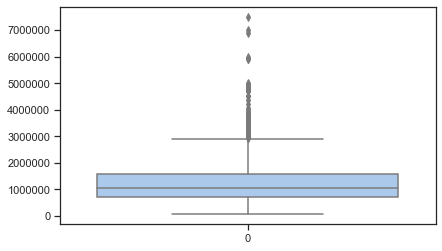

In [84]:
sns.set_theme(style = 'ticks', palette = 'pastel')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
sns.boxplot(data = df_raw_subset['sales_price'])

<AxesSubplot:xlabel='sales_price'>

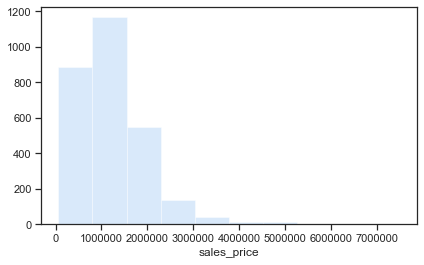

In [85]:
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
sns.distplot(df_raw_subset['sales_price'], bins=10, kde=False)